In [2]:
#import libraries
import ast
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt
import seaborn as sns

#import dataset
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

#clean dataset
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

In [7]:
df_DA_US = df[(df['job_country'] == 'United States') & (df['job_title_short'] == 'Data Analyst')].dropna(subset = 'salary_year_avg')
total_postings = len(df_DA_US)
df_DA_US = df_DA_US.explode('job_skills')
df_skills = df_DA_US.groupby('job_skills')['salary_year_avg'].agg(['count', 'median']).sort_values(by='count', ascending=False)
df_skills = df_skills.head(10).sort_values(by='median', ascending=False)
df_skills['percentage'] = df_skills['count'].div(total_postings) * 100

df_skills

,count,median,percentage
job_skills,,,
python,1431,97500.00,32.896552
tableau,1364,92875.00,31.356322
r,893,92500.00,20.528736
sql server,286,92500.00,6.574713
sql,2508,91000.00,57.655172
sas,926,90000.00,21.287356
power bi,838,90000.00,19.264368
powerpoint,462,85000.00,10.620690
excel,1808,84392.00,41.563218


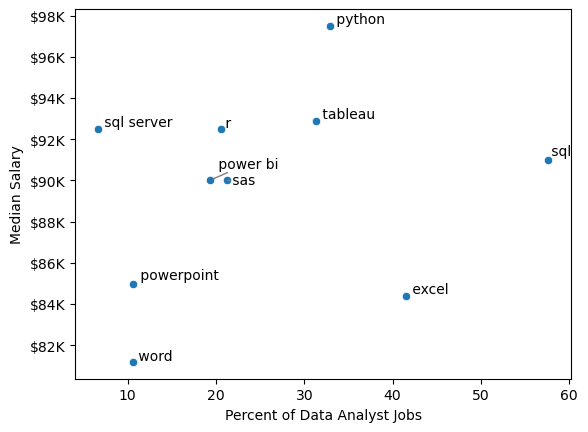

In [20]:
from adjustText import adjust_text

sns.scatterplot(data=df_skills, x = 'percentage', y = 'median')
plt.ylabel('Median Salary')
plt.xlabel('Percent of Data Analyst Jobs')

ax = plt.gca()
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, pos: f'${int(y/1000)}K'))  

# Add labels to points and collect them in a list
texts = []
for i, txt in enumerate(df_skills.index):
    texts.append(plt.text(df_skills['percentage'].iloc[i], df_skills['median'].iloc[i], " " + txt))



adjust_text(texts, arrowprops=dict(arrowstyle='->', color='gray'))
plt.show()